<h1 align="center"> Computation for Physicists </h1>
<h2 align="center"> <em>Nonlinear Equations</em> </h2>
<h2 align="center" > <a href="mailto:duan@unm.edu">Dr. Duan</a> (UNM) </h2>

# Eigenvalues and Eigenvectors

- Eigenvalues are usually obtained through iterative processes. 

- The eigenvector of matrix $\mathbf{A}$ that corresponds to its eigenvalue of the largest magnitude can be obtained by power iteration.

- Shifting the matrix by a multiple of the identity matrix can be useful.

- QR iteration can be used to obtain all the eigenvalues simultaneously. It usually takes more resources to obtain the eigenvectors.

- The SVD of matrix $\mathbf{A}$ is related to the eigensystem of $\mathbf{A}^\dagger\mathbf{A}$ and $\mathbf{A}\mathbf{A}^\dagger$.

# Homework

- The roots of the monic polynomial $p(t)=c_0 + c_1 t + \cdots + c_{n-1} t^{n-1} + t^n$ are the same as the eigenvalues of its companion matrix
$$C(p) = \begin{bmatrix}
0 & 0 & \cdots & 0 & -c_0 \\
1 & 0 & \cdots & 0 & -c_1 \\
0 & 1 & \cdots & 0 & -c_2 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \cdots & 1 & -c_{n-1}
\end{bmatrix}.$$

- Define class `Polynomial` to generate callable objects that produce the function values of polynomials. A `Polynomial` object is inialized by the coefficients of the polynomial, and it has a method `roots()` to compute the roots of the polynomial. Document and validate your code.

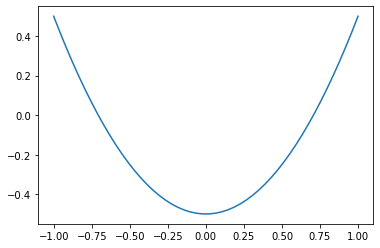

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import homework.hw7 as hw7

x = np.linspace(-1,1)
plt.plot(x, hw7.Polynomial([-0.5,0,1])(x)) # plot f(x)= x**2 - 1/2
plt.show()

In [2]:
from numpy.random import random

f = hw7.Polynomial(random(10)*10-5)

In [3]:
f.__dict__

{'coe': array([-3.08714397, -3.23029421,  0.09303485,  0.95596786, -4.96265465,
         4.94929922,  3.74300035,  4.33098943,  4.39391794,  1.86987376])}

In [4]:
f.roots()

array([ 0.87763447+0.j        ,  0.48710291+0.74551912j,
        0.48710291-0.74551912j,  0.04398933+1.28009049j,
        0.04398933-1.28009049j, -0.56462971+0.37263273j,
       -0.56462971-0.37263273j, -1.58020345+0.81375162j,
       -1.58020345-0.81375162j])

In [5]:
np.abs(f(f.roots()))

array([5.87307980e-14, 1.26048212e-14, 1.26048212e-14, 2.13754120e-13,
       2.13754120e-13, 1.73481021e-15, 1.73481021e-15, 1.79754674e-13,
       1.79754674e-13])

# Nonlinear Equations

- A nonlinear equation $f(x)=0$ can have 0 to infinite number of solutions.

- If $f(x_*)=f'(x_*)=\cdots=f^{(m-1)}(x_*)=0$ but $f^{(m)}(x_*)\neq0$, then $x_*$ is a root to $f(x)$ of _multiplicity_ $m$. A root of multiplicity 1 is called a _simple root_.

- The condition number of the root finding problem $f(x)=0$ is $|1/f'(x_*)|$. Therefore, a multiple-root problem is ill-conditioned, i.e. $|f(\hat{x})|\approx0$ does not guarantee that $\hat{x}\approx x_*$.

- [`scipy.optimize.root_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html)implements several methods for finding the roots of a nonlinear function.

# Convergence Rate

- If $$\lim_{k\rightarrow\infty}\frac{|\epsilon_{k+1}|}{|\epsilon_k|^r} = C$$
in an algorithm,
where $\epsilon_k = x_k - x_*$ is the error of the approximate solution $x_k$ in the $k$th iteration, and $C$ is a nonzero constant, then the algorithm has a convergence rate of $r$.

- An algorithm converges linearly if $r=1$ and $C<1$. A fixed number of correct digits is gained in each iteration.

- An algorithm converges superlinearly if $r>1$. In particular, an algorithm of the quadratic convergence rate has $r=2$.

# Bisection Method

- A continuous function $f(x)$ always has a root in $[a, b]$ if $f(a)f(b)<0$. 

- The _bisection_ method repeatedly halves the bracket and keeps the root in the bracket until the size of the bracket is less than the specified error tolerance. It is guaranteed to converge but slowly ($r=1$ and $C=0.5$).

In [6]:
from scipy.optimize import root_scalar
f = lambda x: x**2 - 1.0
sol = root_scalar(f, bracket=[0, 10], method='bisect')
sol.root

1.0000000000002274

In [7]:
sol

      converged: True
           flag: 'converged'
 function_calls: 45
     iterations: 43
           root: 1.0000000000002274

# Newton's Method

- _Newton's method_ requires the knowledge of $f'(x)$ and approximates the nonlinear function as a linear function:
$$ f(x_k) \approx f(x_*) + f'(x_*)(x_k - x_*)
\quad\Longrightarrow\quad
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_{k})}.$$

- Newton's method converges quadratically if starting from a point close enough to the root.

In [10]:
dfdx = lambda x: 2.0*x # derivative of f
root_scalar(f, x0=0.1, fprime = dfdx, method='newton')

      converged: True
           flag: 'converged'
 function_calls: 16
     iterations: 8
           root: 1.0

# Secant Method 

- _Secant method_ does not require $f'(x)$ but approximates it by finite difference:
$$x_{k+1}=x_k - \frac{f(x_k)}{[f(x_k)-f(x_{k-1})]/(x_k-x_{k-1})}.$$

- Secant method converges superlinearly with $r\approx1.6$.

In [11]:
root_scalar(f, x0=0., x1=0.1, method='secant')

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 13
           root: 1.0

# Hybrid Methods

- Bisection method is safe but slow, and Newton's and Secant methods are fast but may not converge unless they start from close to the root. Hybrid methods combine two kinds of methods to achieve both reliability and efficiency.

- The most recommend method in `scipy.optimize` is `brentq`.

In [12]:
root_scalar(f, bracket=[0, 10], method='brentq')

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 13
           root: 1.0000000000002276

# Fixed-Point Iteration

- The _fixed point_ $x_*$ of function $g(x)$ satisfies $x_*=g(x_*)$.

- _Fixed-point iteration_ $x_{k+1}=g(x_k)$ can be used to find $x_*$. 

- If $|g'(x_*)|<1$, then there exists an interval around $x_*$ that the iteration can converges (linearly if $|g'(x_*)|>0$ or at least quadratically if $g'(x_*)=0$).

- [`scipy.optimize.fixed_point()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html) can be used to find a fixed point of a function.

In [13]:
from scipy.optimize import fixed_point
g = lambda x: f(x) + x
fixed_point(g, 0.1)

array(-1.)

In [14]:
fixed_point(g, 0.1, method='iteration') # simple iteration fails because g'(1) > 1

RuntimeError: Failed to converge after 500 iterations, value is -1.0297426020639704

# Systems of Nonlinear Equations

- Solving nonlinear system $\mathbf{f}(\mathbf{x})=\mathbf{0}$ is much more difficult than solving a single nonlinear equation. There is no simply way to guarantee the convergence.

- Fixed-point iteration can still be used.


In [15]:
def func(x, c1, c2): # example from SciPy
   return np.sqrt(c1/(x+c2))
c1 = np.array([10,12.])
c2 = np.array([3, 5.])
sol = fixed_point(func, x0=[1.2, 1.3], args=(c1,c2))
sol

array([1.4920333 , 1.37228132])

In [16]:
np.allclose(sol, func(sol, c1, c2))

True

- Newton's method becomes 
$$\mathbf{x}_{k+1}=\mathbf{x}_{k} - \mathbf{J}^{-1}(\mathbf{x}_{k})\mathbf{f}(\mathbf{x}_{k}),$$ 
where $\mathbf{J}(\mathbf{x}_{k})$ is the Jacobian matrix with the elements $J_{ij}=\partial f_i / \partial x_j$. In practice, one solves the _Newton step_ $\mathbf{s}_{k}=\mathbf{x}_{k+1}-\mathbf{x}_{k}$ from 
$$\mathbf{J}(\mathbf{x}_{k})\mathbf{s}_k = \mathbf{f}(\mathbf{x}_{k}).$$

- _Broyden's method_ approximates the Jacobian with $\mathbf{B}_{k}$ (with the least change) that satisfies the equation 
$$\mathbf{B}_{k}(\mathbf{x}_{k}-\mathbf{x}_{k-1})=\mathbf{f}(\mathbf{x}_{k})-\mathbf{f}(\mathbf{x}_{k-1}).$$

- [`scipy.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html) implements several methods to solve nonlinear systems.

In [17]:
from scipy.optimize import root

g = lambda x: func(x, c1, c2) - x
root(g, x0=[0,0], method='broyden1')

     fun: array([ 1.70637870e-06, -2.03374617e-06])
 message: 'A solution was found at the specified tolerance.'
     nit: 8
  status: 1
 success: True
       x: array([1.49203184, 1.37228316])

In [18]:
root(g, x0=[0,0]) # default to 'hybr' method

    fjac: array([[-0.99985257, -0.01717103],
       [ 0.01717103, -0.99985257]])
     fun: array([ 1.45394807e-12, -9.99200722e-13])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.11564245e-08,  7.94927243e-09])
       r: array([ 1.13783213, -0.02000263,  1.13534629])
  status: 1
 success: True
       x: array([1.4920333 , 1.37228132])

# Packing/Unpacking Function Arguments
- Use tuple and dictionary to pass multiple arguments.

In [19]:
def f(x, y, z):
    print(f'f(x={x}, y={y}, z={z})')
    
args = 2, 3
f(1, *args) # Use * to unpack tuple

f(x=1, y=2, z=3)


In [20]:
kargs = {'z': 1}
f(*args, **kargs) # use ** to unpack dict

f(x=2, y=3, z=1)


- Use `*` and `**` to collect the optional arguments without and with keys.

In [21]:
def g(a, *args, **kargs): # a is required
    l = [str(a)] # required arguments
    l += [str(val) for val in args] # optional positional arguments
    l += [f'{key}={val}' for key, val in kargs.items()] # optional args with keys
    print('g(' + ', '.join(l) + ')')

In [22]:
g(2)
g(2, 3, 4)
g(2, 3, x=5, y=6)

g(2)
g(2, 3, 4)
g(2, 3, x=5, y=6)


# Homework

- Utilize `scipy.optimize.root()` to implement a function that computes the inverse of an arbitrary square matrix.

- Hint: Use the `reshape()` method of the NumPy array to reshape a matrix into a vector and vice versa.